# 딥러닝 개요

# 환경설정

- Colab : 코드 작성, 라이브러리 연동, GPU 활용
- 구글 드라이브 : 데이터 가져오거나 저장

- 코랩에서 구글 드라이브에 있는 파일 접근
  - 왼쪽의  height = 300 width = 300>image.png 아이콘을 클릭
    - 상단의 image.png아이콘을 클릭

(-0.5, 221.5, 299.5, -0.5)

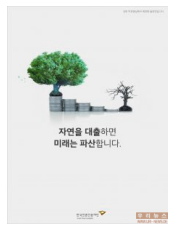

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/lecture_image/nature.png")

plt.imshow(img)
plt.axis("off")

In [ ]:
import pandas as pd
bmi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/bmi_500 (1).csv")
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


#GPU 체크하기

In [1]:
 # 할당된 GPU 목록 확인하기
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13794055073315026888
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15228818453847877578
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
# 사용 가능한 GPU 목록
import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# 할당된 GPU를 실행
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus :
  try:
    # GPU메모리를 사용
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as re :
    print(re)

In [ ]:
# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
seesion = InteractiveSession(config = config)

# 설치된 라이브러리 확인

In [ ]:
!pip freeze

# Keras 프레임워크를 이용해서 AND논리 학습하기

- Sequential() :신경망을 생성하는 함수
- Dense() : 신경망에 퍼셉트론 층을 설정
  - units : 현재 층의 퍼셉트론의 수 (출력의 수)
  - input_dim : 입력의 수 (입력되는 데이터의 특성의 수)
- Activation() : 활성화함수를 설정(Dense 쓰면 활성함수가 추가되어야함)
- add() : Dense()나 Aactivation() 등을 신경망에 추가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model1= Sequential()

model1.add(Dense(units = 1, input_dim = 2))
model1.add(Activation("sigmoid"))

# summary() 생성된 신경망의 구조를 출력
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 데이터 정의

In [ ]:
import pandas as pd
import numpy as np

X_AND = [[0,1],[0,1],[1,0],[1,1]]
y_AND = [0, 0, 0, 1]

# 파라미터 (w, b)들의 초기값의 시드를 설정
- 일반적으로 신경망을 생성하면 파라미터(w, b) 값을 랜덤으로 초기화
- 항상 동일한 초기값으로 설정되도록 시드를 설정

In [ ]:
import tensorflow as tf
import numpy as np

seed=0

np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# 작성한 신경망을 학습을 할 수 있도록 컴파일
# - loss : 사용할 손실함수(비용함수)
#   - 회귀 : mse 또는 mean_squared_error
#   - 이진분류 : binary_crossentroy
#   - 다진분류 : categorical_crossentropy
# - optimizer : 최적화 함수(경사하강법의 종류)
#   - adam(많이씀)
# - metrics : 평가도구 (정확도 또는 오차)
#   - 회귀 : 표기하지 않음
#   - 분류 : accuracy
model1.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics = ["accuracy"]) #loss와 같이 쓸수있어서 리스트

In [ ]:
# 학습
# batch_size : 한 번 반복할 때 몇 개 데이터를 사용할 것인지 설정
# epochs : 몇번 반복할 것인지 설정(w, b를 몇번 업데이트 할 것인지 설정)
h1 = model1.fit(X_AND, y_AND, batch_size=4, epochs=1000)

In [ ]:
X_new = [[1,0],[1,1],[0,0],[0,1]]
y_new = [0,1,0,0]
pred = model1.predict(X_new)
pred

# XOR 문제 확인

In [ ]:
X_XOR = [[0,0],[0,1],[1,0],[1,1]]
y_XOR = [0,1,1,0]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model2 = Sequential()

model2.add(Dense(units=1, input_dim=2))
model2.add(Activation("sigmoid"))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow._api.v2.config import optimizer
model2.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [ ]:
h2= model2.fit(X_XOR, y_XOR, batch_size=4, epochs=4000)

#MLP 만들기(Multi layer perceptron)

In [ ]:
model3 = Sequential()

model3.add(Dense(units=1, input_dim=2))
model3.add(Activation("sigmoid"))
# 2번쨰 층부터는 input_dim을 설정하지 않아도 자동으로 인식
model3.add(Dense(units=1))
model3.add(Activation("sigmoid"))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


- 퍼셉트론 5개로 신경망 만들기

In [ ]:
model4 = Sequential()

model4.add(Dense(units=4, input_dim=2))
model4.add(Activation("sigmoid"))

model4.add(Dense(units=1))
model4.add(Activation("sigmoid"))

model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 activation_14 (Activation)  (None, 4)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
 activation_15 (Activation)  (None, 1)                 0         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow._api.v2.config import optimizer
model4.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [ ]:
h4= model4.fit(X_XOR, y_XOR, batch_size=4, epochs=1500)

Epoch 1/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0492 - accuracy: 1.0000
Epoch 2/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0491 - accuracy: 1.0000
Epoch 3/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0491 - accuracy: 1.0000
Epoch 4/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0491 - accuracy: 1.0000
Epoch 5/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0491 - accuracy: 1.0000
Epoch 6/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0490 - accuracy: 1.0000
Epoch 7/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0490 - accuracy: 1.0000
Epoch 8/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0490 - accuracy: 1.0000
Epoch 9/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0489 - accuracy: 1.0000
Epoch 10/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0489 - accuracy: 1.0000
Epoch 11/1500
1

#[실습] 6개 퍼셉트론이 3층으로 구성된 신경 설계

In [ ]:
model5 = Sequential()

#입력층
model5.add(Dense(units=3, input_dim=2, activation="sigmoid"))

#은닉층
model5.add(Dense(units=2, activation="sigmoid"))

#출력층
model5.add(Dense(units=1, activation="sigmoid"))

model5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 3)                 9         
                                                                 
 dense_24 (Dense)            (None, 2)                 8         
                                                                 
 dense_25 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6 = Sequential()

#입력층
model6.add(Dense(units=4, input_dim=2, activation="sigmoid"))
#은닉층(특성추출기)
model6.add(Dense(units=3, activation="sigmoid"))
model6.add(Dense(units=2, activation="sigmoid"))
model6.add(Dense(units=3, activation="sigmoid"))
#출력층
model6.add(Dense(units=1, activation="sigmoid"))

model6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 4)                 12        
                                                                 
 dense_27 (Dense)            (None, 3)                 15        
                                                                 
 dense_28 (Dense)            (None, 2)                 8         
                                                                 
 dense_29 (Dense)            (None, 3)                 9         
                                                                 
 dense_30 (Dense)            (None, 1)                 4         
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


# 신경망 층을 쌓는 방법들

- 디코딩 방식 : 퍼셉트론을 점점 늘려가는 방식(특성추출)
- 인코딩 방식 : 퍼셉트론을 점점 줄여가는 방식(특성선택)
- 리니어 방식 : 퍼셉트론을 수를 일정하게 배치하는 방식
- 인코딩 -> 디코딩 방식
- 디코딩 -> 인코딩 방식
- 리니어 -> 디코딩 방식
- 리니어 -> 인코딩 방식
- 디코딩 -> 리니어 방식
- 인코딩 -> 리니어 방식 ...~~

#폐암환자 데이터셋을 이용하여 생존유무 예측하기

In [ ]:
#데이터로드
import pandas as pd
col_name = ["번호", "유형", "폐활량", "호기량", "상태", "통증", "객혈",
            "호흡", "기침", "약화", "크기", "당뇨", "MI", "PAD",
            "흡연", "천식", "나이", "생존"]

file_path="/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/"
data = pd.read_csv(file_path + "ThoraricSurgery.csv", header=None,
                   index_col=0, names=col_name)
data.head()

# 수치형 컬럼: 폐활량, 호기량, 나이
# 유형 : 1, 2, 3, 4, 5, 6, 8
# 상태 : 0, 1, 2
# 크기 : 11, 12, 13, 14
# MI(심근경색), PAD(말초동맥경화)

,유형,폐활량,호기량,상태,통증,객혈,호흡,기침,약화,크기,당뇨,MI,PAD,흡연,천식,나이,생존
번호,,,,,,,,,,,,,,,,,
293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [ ]:
# 데이터의 구조 및 개수
data.shape

# 데이터 갯수 : 470개
# 특성의 수 : 17개 (종양유형, 크기, 폐활량, 기침여부, 흡연여부 등)

(470, 18)

In [ ]:
# 라벨 데이터의 클래스의 수와 클래스별 데이터 갯수
print("라벨 데이터의 클래스 수 : ", data["생존"].unique())
print("라벨데이터의 클래스별 데이터 수 : ", data["생존"].value_counts())
print("유형컬럼 데이터의 클래스 클래스 수 : ", data["유형"].unique())
print("상태컬럼 데이터의 클래스 클래스 수 : ", data["상태"].unique())
print("크기컬럼 데이터의 클래스 클래스 수 : ", data["크기"].unique())

라벨 데이터의 클래스 수 :  [0 1]
라벨데이터의 클래스별 데이터 수 :  0    400
1     70
Name: 생존, dtype: int64
유형컬럼 데이터의 클래스 클래스 수 :  [1 2 3 4 5 6 8]
상태컬럼 데이터의 클래스 클래스 수 :  [0 1 2]
크기컬럼 데이터의 클래스 클래스 수 :  [12 14 11 13]


In [ ]:
#특성데이터와 라벨데이터로 분리
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

X.shape, y.shape

((470, 16), (470,))

In [ ]:
# 시드 설정
import tensorflow as tf
import numpy as np

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
#신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model7 = Sequential()

#입력층
model7.add(Dense(units=40, input_dim=16, activation="sigmoid")) #처음에는 input_dim보다 크게 설정

#은닉층
model7.add(Dense(units=30, activation="sigmoid"))
model7.add(Dense(units=20, activation="sigmoid"))
model7.add(Dense(units=10, activation="sigmoid"))
model7.add(Dense(units=5, activation="sigmoid"))

#출력층
model7.add(Dense(units=1, activation="sigmoid"))

model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                680       
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,801
Trainable params: 2,801
Non-trainabl

In [ ]:
from tensorflow._api.v2.config import optimizer
model7.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])
model7.fit(X,y,batch_size=16, epochs=300)

In [ ]:
model7.fit(X,y,batch_size=16, epochs=300)

Epoch 1/300
30/30 [==============================] - 4s 3ms/step - loss: 0.9971 - accuracy: 0.1489
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 0.8522 - accuracy: 0.1489
Epoch 3/300
30/30 [==============================] - 0s 3ms/step - loss: 0.7410 - accuracy: 0.1489
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.8511
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.8511
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.8511
Epoch 7/300
30/30 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.8511
Epoch 8/300
30/30 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.8511
Epoch 9/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.8511
Epoch 10/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.8511
Epoch 11/

# 모델 평가

- evaluate(특성, 라벨) : 오차와 정확도 반환

In [ ]:
model7.evaluate(X, y)

# 오차 정확도 반환

15/15 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8511


[0.3864612579345703, 0.8510638475418091]

In [ ]:
# 예측
y_pred = model7.predict(X)

for i in range(1,10) :
  print(y_pred[i])

[0.27884918]
[0.11103025]
[0.10582906]
[0.11624408]
[0.10197606]
[0.09391481]
[0.10330742]
[0.11967008]
[0.0916292]


# 라벨을 원핫인코딩한 데이터를 학습

- 출력층의 units를 라벨의 클래스 수와 동일하게 설정
- 출력층의 activation를 softmax로 설정

In [ ]:
import pandas as pd
# y를 원핫인코딩
y_en = pd.get_dummies(y)

y_en.shape

(470, 2)

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model8 = Sequential()

#입력층
model8.add(Dense(units=40, input_dim=16, activation="sigmoid")) #처음에는 input_dim보다 크게 설정

#은닉층
model8.add(Dense(units=30, activation="sigmoid"))
model8.add(Dense(units=20, activation="sigmoid"))
model8.add(Dense(units=10, activation="sigmoid"))
model8.add(Dense(units=5, activation="sigmoid"))

#출력층
#라벨을 원핫인코딩 한 경우네는 units을 라벨의 클래스 수로 설정
# activation = softmax 출력층에만  은닉층와 출력층의 softmax의 역할이 다르다
model8.add(Dense(units=2, activation="softmax"))

model8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                680       
                                                                 
 dense_13 (Dense)            (None, 30)                1230      
                                                                 
 dense_14 (Dense)            (None, 20)                620       
                                                                 
 dense_15 (Dense)            (None, 10)                210       
                                                                 
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
 dense_17 (Dense)            (None, 2)                 12        
                                                                 
Total params: 2,807
Trainable params: 2,807
Non-traina

In [ ]:
from tensorflow._api.v2.config import optimizer
model8.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [ ]:
h8 = model8.fit(X,y_en,batch_size=16, epochs=1000)

Epoch 1/1000
30/30 [==============================] - 1s 3ms/step - loss: 0.8831 - accuracy: 0.1489
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.7836 - accuracy: 0.1489
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.3447
Epoch 4/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.8511
Epoch 5/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.8511
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5700 - accuracy: 0.8511
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.8511
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8511
Epoch 9/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.8511
Epoch 10/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.8511

In [ ]:
y_pred = model8.predict(X)

for i in range(1,10) :
  print(y_pred[i])

[0.9910719 0.0089281]
[0.99118036 0.00881962]
[0.99117494 0.00882505]
[0.9910981  0.00890185]
[0.99114424 0.00885572]
[0.99117893 0.00882109]
[0.99116427 0.00883567]
[0.9911617  0.00883829]
[0.99117905 0.0088209 ]


# wine 데이터 셋을 활용한 회귀/분류 학습

In [ ]:
# 데이터 불러오기
wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/wine.csv")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
wine.shape

(6497, 13)

In [ ]:
print(wine["quality"].unique())
print(wine["type"].unique())

[5 6 7 4 8 3 9]
[1 0]


# 회귀 분석

In [ ]:
# X = wine.drop(columns=['alcohol'], axis=1) 
# y = wine.loc[:, 'alcohol']

y = wine["alcohol"]
del wine['alcohol']
X = wine

X.shape, y.shape

((6497, 12), (6497,))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model9= Sequential()

model9.add(Dense(units=24, input_dim=12, activation="sigmoid"))

model9.add(Dense(units=48, activation="sigmoid"))
model9.add(Dense(units=24, activation="sigmoid"))

# 회귀인 경우 units는 1로 activation은 linear을 쓰거나 activation을 설정하지 않음
# model9.add(Dense(units=1, activation="linear"))
model9.add(Dense(units=1))

model9.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 24)                312       
                                                                 
 dense_23 (Dense)            (None, 48)                1200      
                                                                 
 dense_24 (Dense)            (None, 24)                1176      
                                                                 
 dense_25 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 회귀인 경우 loss는 mse, metrics는 설정하지 않음

model9.compile(loss="MSE", optimizer="adam")

In [ ]:
h9 = model9.fit(X, y, batch_size=100, epochs=300)

Epoch 1/300
65/65 [==============================] - 0s 3ms/step - loss: 85.7435
Epoch 2/300
65/65 [==============================] - 0s 3ms/step - loss: 49.7828
Epoch 3/300
65/65 [==============================] - 0s 2ms/step - loss: 33.2696
Epoch 4/300
65/65 [==============================] - 0s 2ms/step - loss: 22.8429
Epoch 5/300
65/65 [==============================] - 0s 3ms/step - loss: 15.6904
Epoch 6/300
65/65 [==============================] - 0s 2ms/step - loss: 10.6876
Epoch 7/300
65/65 [==============================] - 0s 3ms/step - loss: 7.0580
Epoch 8/300
65/65 [==============================] - 0s 3ms/step - loss: 4.6560
Epoch 9/300
65/65 [==============================] - 0s 3ms/step - loss: 3.2095
Epoch 10/300
65/65 [==============================] - 0s 3ms/step - loss: 2.3707
Epoch 11/300
65/65 [==============================] - 0s 3ms/step - loss: 1.9038
Epoch 12/300
65/65 [==============================] - 0s 3ms/step - loss: 1.6565
Epoch 13/300
65/65 [===========

In [ ]:
model9.evaluate(X,y)

204/204 [==============================] - 0s 2ms/step - loss: 0.6513


0.6513224840164185

# 결과 시각화 하기

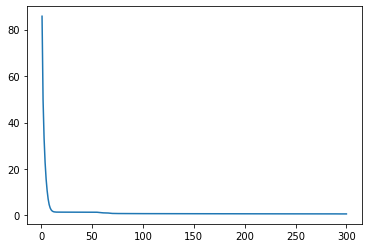

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 loss값들을 가져온다
loss= h9.history["loss"]

# 반복수
xaxis = range(1, len(loss)+1)

plt.plot(xaxis, loss)

# 훈련데이터와 테스트데이터로 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model10= Sequential()

model10.add(Dense(units=24, input_dim=12, activation="sigmoid"))

model10.add(Dense(units=48, activation="sigmoid"))
model10.add(Dense(units=24, activation="sigmoid"))

# 회귀인 경우 units는 1로 activation은 linear을 쓰거나 activation을 설정하지 않음
# model9.add(Dense(units=1, activation="linear"))
model10.add(Dense(units=1))

model10.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 24)                312       
                                                                 
 dense_27 (Dense)            (None, 48)                1200      
                                                                 
 dense_28 (Dense)            (None, 24)                1176      
                                                                 
 dense_29 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model10.compile(loss="MSE", optimizer="adam")

In [ ]:
h10 = model10.fit(X_train, y_train, batch_size=100, epochs=300,
                  validation_data=(X_test, y_test))

Epoch 1/300
49/49 [==============================] - 1s 6ms/step - loss: 93.0196 - val_loss: 69.0363
Epoch 2/300
49/49 [==============================] - 0s 4ms/step - loss: 55.8819 - val_loss: 45.4052
Epoch 3/300
49/49 [==============================] - 0s 3ms/step - loss: 39.2816 - val_loss: 33.5978
Epoch 4/300
49/49 [==============================] - 0s 4ms/step - loss: 29.8608 - val_loss: 26.2304
Epoch 5/300
49/49 [==============================] - 0s 3ms/step - loss: 23.5366 - val_loss: 20.7584
Epoch 6/300
49/49 [==============================] - 0s 3ms/step - loss: 18.6085 - val_loss: 16.3583
Epoch 7/300
49/49 [==============================] - 0s 3ms/step - loss: 14.5580 - val_loss: 12.5267
Epoch 8/300
49/49 [==============================] - 0s 3ms/step - loss: 10.7947 - val_loss: 9.1240
Epoch 9/300
49/49 [==============================] - 0s 3ms/step - loss: 7.9271 - val_loss: 6.7699
Epoch 10/300
49/49 [==============================] - 0s 4ms/step - loss: 5.9148 - val_loss: 5

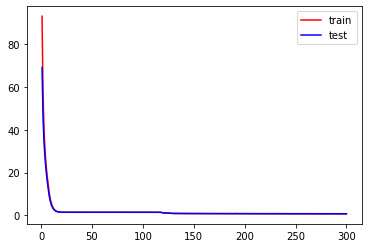

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 loss 값들을 가져온다
loss= h10.history["loss"]
val_loss = h10.history["val_loss"]


# 반복수
xaxis = range(1, len(loss)+1)

plt.plot(xaxis, loss, "r", label="train")
plt.plot(xaxis, val_loss, "b", label="test")
plt.legend()

# 다진 분류

In [ ]:
# 라벨 값을 quality 컬럼 사용
wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/wine.csv")
y = wine["quality"]
del wine["quality"]
X = wine

X.shape, y.shape

((6497, 12), (6497,))

In [ ]:
import pandas as pd
# y를 원핫인코딩
y_en = pd.get_dummies(y)

y_en.shape

(6497, 7)

In [ ]:
# 훈련데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_en, random_state = 999)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872, 7), (1625, 7))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model11 = Sequential()

#입력층
model11.add(Dense(units=24, input_dim=12, activation="sigmoid")) #처음에는 input_dim보다 크게 설정

#은닉층
model11.add(Dense(units=48, activation="sigmoid"))
model11.add(Dense(units=64, activation="sigmoid"))
model11.add(Dense(units=48, activation="sigmoid"))
model11.add(Dense(units=24, activation="sigmoid"))

#출력층
#라벨을 원핫인코딩 한 경우네는 units을 라벨의 클래스 수로 설정
# activation = softmax 출력층에만  은닉층와 출력층의 softmax의 역할이 다르다
#y = 출력층의 수
model11.add(Dense(units=7, activation="softmax"))

model11.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 24)                312       
                                                                 
 dense_31 (Dense)            (None, 48)                1200      
                                                                 
 dense_32 (Dense)            (None, 64)                3136      
                                                                 
 dense_33 (Dense)            (None, 48)                3120      
                                                                 
 dense_34 (Dense)            (None, 24)                1176      
                                                                 
 dense_35 (Dense)            (None, 7)                 175       
                                                                 
Total params: 9,119
Trainable params: 9,119
Non-traina

In [ ]:
model11.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
h11 = model11.fit(X_train, y_train, batch_size=100, epochs=150,
                  validation_data=(X_test, y_test))

Epoch 1/150
49/49 [==============================] - 1s 10ms/step - loss: 1.4531 - accuracy: 0.4317 - val_loss: 1.3086 - val_accuracy: 0.4511
Epoch 2/150
49/49 [==============================] - 0s 5ms/step - loss: 1.3055 - accuracy: 0.4317 - val_loss: 1.2693 - val_accuracy: 0.4511
Epoch 3/150
49/49 [==============================] - 0s 4ms/step - loss: 1.2915 - accuracy: 0.4317 - val_loss: 1.2612 - val_accuracy: 0.4511
Epoch 4/150
49/49 [==============================] - 0s 4ms/step - loss: 1.2872 - accuracy: 0.4317 - val_loss: 1.2600 - val_accuracy: 0.4511
Epoch 5/150
49/49 [==============================] - 0s 5ms/step - loss: 1.2855 - accuracy: 0.4317 - val_loss: 1.2591 - val_accuracy: 0.4511
Epoch 6/150
49/49 [==============================] - 0s 5ms/step - loss: 1.2843 - accuracy: 0.4317 - val_loss: 1.2562 - val_accuracy: 0.4511
Epoch 7/150
49/49 [==============================] - 0s 4ms/step - loss: 1.2839 - accuracy: 0.4317 - val_loss: 1.2546 - val_accuracy: 0.4511
Epoch 8/150


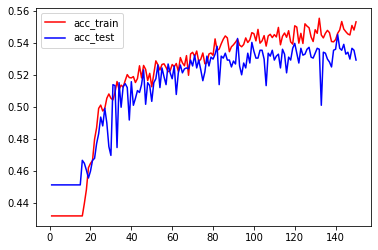

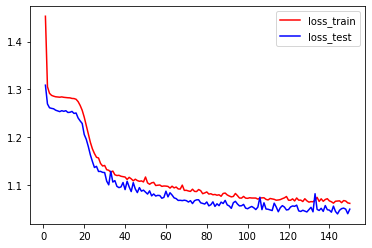

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 loss 값들을 가져온다
loss= h11.history["loss"]
val_loss = h11.history["val_loss"]

acc= h11.history["accuracy"]
val_acc = h11.history["val_accuracy"]


# 반복수
xaxis = range(1, len(loss)+1)
# 정확도
plt.plot(xaxis, acc, "r", label="acc_train")
plt.plot(xaxis, val_acc, "b", label="acc_test")
plt.legend()
plt.show()
#오차
plt.plot(xaxis, loss, "r", label="loss_train")
plt.plot(xaxis, val_loss, "b", label="loss_test")
plt.legend()
plt.show()

# [실습] 회귀분석-보스톤집값
- 13개의 특성과 1개의 클래스(가격)로 구성
  - CRIM : 인구 1인당 범죄 발생 수
  - ZN : 25,000평방 피트 이상의 주거 구역 비중
  - INDUS : 소매업 외 상업이 차지하는 면적 비율
  - CHAS : 찰스강 위치 변수 (1: 강 주변, 0: 이외)
  - NOX : 일산화질소 농도
  - RM : 집의 평균 방 수
  - AGE : 1940년 이전 지어진 비율
  - DIS : 5가지 보스턴 시 고용 시설까지의 거리
  - RAD : 순환고속도로의 접근 용이성
  - TAX : 10,000달러 당 부동산 세율 총계
  - PTRATIO : 지역별 학생과 교사 비율
  - B : 지역별 흑인 비율
  - LSTAT : 급여가 낮은 직업에 종사하는 인구 비율 (%)
  - 가격 (단위 : 1,000달러)



In [ ]:
import tensorflow as tf
import numpy as np

seed = 0 
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

65536/57026 [==================================] - 0s 0us/step


((404, 13), (102, 13), (404,), (102,))

In [ ]:
import pandas as pd

train_data = pd.DataFrame(X_train)

train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

boston_model= Sequential()
#입력층
boston_model.add(Dense(units=32, input_dim=13, activation="sigmoid"))

#은닉층
boston_model.add(Dense(units=64, activation="sigmoid"))
boston_model.add(Dense(units=32, activation="sigmoid"))
boston_model.add(Dense(units=16, activation="sigmoid"))

# 회귀인 경우 units는 1로 activation은 linear을 쓰거나 activation을 설정하지 않음
# model9.add(Dense(units=1, activation="linear"))
# 출력층
boston_model.add(Dense(units=1))

boston_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
boston_model.compile(loss="MSE", optimizer="adam")

In [ ]:
boston_pre = boston_model.fit(X_train, y_train, batch_size=10, epochs=200,
                  validation_data=(X_test, y_test))

Epoch 1/200
41/41 [==============================] - 3s 6ms/step - loss: 602.7023 - val_loss: 597.8516
Epoch 2/200
41/41 [==============================] - 0s 3ms/step - loss: 543.4326 - val_loss: 548.0049
Epoch 3/200
41/41 [==============================] - 0s 3ms/step - loss: 504.9301 - val_loss: 517.9155
Epoch 4/200
41/41 [==============================] - 0s 4ms/step - loss: 481.6801 - val_loss: 498.0077
Epoch 5/200
41/41 [==============================] - 0s 3ms/step - loss: 464.0576 - val_loss: 480.7596
Epoch 6/200
41/41 [==============================] - 0s 3ms/step - loss: 446.9993 - val_loss: 462.5831
Epoch 7/200
41/41 [==============================] - 0s 3ms/step - loss: 429.6921 - val_loss: 445.3969
Epoch 8/200
41/41 [==============================] - 0s 3ms/step - loss: 414.0186 - val_loss: 429.9198
Epoch 9/200
41/41 [==============================] - 0s 3ms/step - loss: 399.6187 - val_loss: 415.7514
Epoch 10/200
41/41 [==============================] - 0s 3ms/step - loss:

In [ ]:
# 에측하기
y_pred = boston_model.predict(X_test)

for i in range(10) :
  print(f"실제가격 : {y_test[i]}, 예측가격 : {y_pred[i]}")

실제가격 : 7.2, 예측가격 : [12.478954]
실제가격 : 18.8, 예측가격 : [15.776944]
실제가격 : 19.0, 예측가격 : [24.670969]
실제가격 : 27.0, 예측가격 : [22.386795]
실제가격 : 22.2, 예측가격 : [24.62036]
실제가격 : 24.5, 예측가격 : [23.110006]
실제가격 : 31.2, 예측가격 : [24.323256]
실제가격 : 22.9, 예측가격 : [24.620419]
실제가격 : 20.5, 예측가격 : [22.980795]
실제가격 : 23.2, 예측가격 : [20.108042]


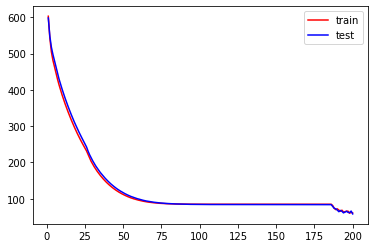

In [ ]:
# 시각화
import matplotlib.pyplot as plt

loss = boston_pre.history["loss"]
val_loss = boston_pre.history["val_loss"]

e = range(1, len(loss) + 1)

plt.plot(e, loss, "r", label="train")
plt.plot(e, val_loss, "b", label="test")
plt.legend()

# [실습]이진 분류

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 훈련데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [ ]:
len(cancer['feature_names'])

30

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

cancer_model = Sequential()

#입력층
cancer_model.add(Dense(units=60, input_dim=30, activation="sigmoid")) #처음에는 input_dim보다 크게 설정

#은닉층
cancer_model.add(Dense(units=30, activation="sigmoid"))
cancer_model.add(Dense(units=20, activation="sigmoid"))
cancer_model.add(Dense(units=10, activation="sigmoid"))
cancer_model.add(Dense(units=5, activation="sigmoid"))

#출력층
cancer_model.add(Dense(units=1, activation="sigmoid"))

cancer_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 60)                1860      
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 4,581
Trainable params: 4,581
Non-traina

In [ ]:
cancer_model.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [ ]:
cancer_pre = cancer_model.fit(X_train, y_train, epochs=100, batch_size=10,
                  validation_data=(X_test, y_test))

Epoch 1/100
43/43 [==============================] - 2s 8ms/step - loss: 0.6611 - accuracy: 0.6268 - val_loss: 0.6582 - val_accuracy: 0.6294
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.6268 - val_loss: 0.6557 - val_accuracy: 0.6294
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 0.6552 - accuracy: 0.6268 - val_loss: 0.6485 - val_accuracy: 0.6294
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6268 - val_loss: 0.6307 - val_accuracy: 0.6294
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.6179 - accuracy: 0.6268 - val_loss: 0.5961 - val_accuracy: 0.6294
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5764 - accuracy: 0.6268 - val_loss: 0.5575 - val_accuracy: 0.6294
Epoch 7/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.6643 - val_loss: 0.5172 - val_accuracy: 0.8112
Epoch 8/100
4

In [ ]:
y_pred = cancer_model.predict(X_test)

for i in range(10, 20) :
  print(f"실제값 : {y_test[i]}, 예측값 : {y_pred[i]}")

실제값 : 1, 예측값 : [0.21378368]
실제값 : 1, 예측값 : [0.44975194]
실제값 : 1, 예측값 : [0.967036]
실제값 : 1, 예측값 : [0.2132055]
실제값 : 1, 예측값 : [0.21582575]
실제값 : 0, 예측값 : [0.06744547]
실제값 : 1, 예측값 : [0.9647981]
실제값 : 0, 예측값 : [0.06660894]
실제값 : 0, 예측값 : [0.21318275]
실제값 : 0, 예측값 : [0.06660873]


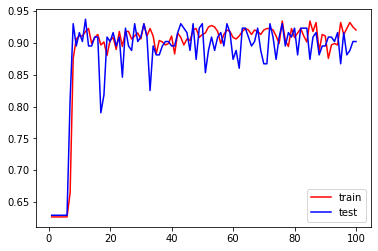

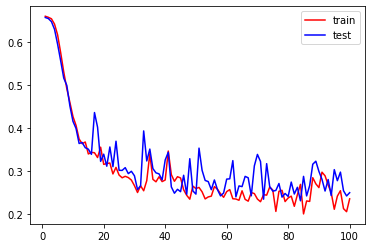

In [ ]:
# 시각화하기
acc = cancer_pre.history["accuracy"]
val_acc = cancer_pre.history["val_accuracy"]
loss = cancer_pre.history["loss"]
val_loss = cancer_pre.history["val_loss"]

e = range(1, len(acc) + 1)

plt.plot(e, acc, "r", label="train")
plt.plot(e, val_acc, "b", label="test")
plt.legend()
plt.show()

plt.plot(e, loss, "r", label="train")
plt.plot(e, val_loss, "b", label="test")
plt.legend()
plt.show()

In [ ]:
# 피마인디언 당뇨병 데이터셋 
# - 768명 데이터
# - 8개의 특성데이터와 1개의 라벨데이터 (1 : 당뇨, 0 : 정상)
# pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/pima.csv",
#                    names=["임신수", "공복혈당", "혈압", "피부두께", "인슐린", 
#                           "BMI", "가족력", "나이", "class"])

pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/pima.csv",
                   names=["pregnant", "plasma", "pressure", "thickness", "insulin",
                          "BMI", "pedigree", "age", "class"])
pima.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   임신수     768 non-null    int64  
 1   공복혈당    768 non-null    int64  
 2   혈압      768 non-null    int64  
 3   피부두께    768 non-null    int64  
 4   인슐린     768 non-null    int64  
 5   BMI     768 non-null    float64
 6   가족력     768 non-null    float64
 7   나이      768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima.describe()

# 결측치, 이상치 여부, 분산정도, 편향정도
# 결측치 : count로 비교
# 이상치 : min과 25%, max와 75% 값이 다른 분위에 크게 변하는 값이 있는지 확인, max 값 확인
# 분산 : mean과 std 비교 (mean보다 std가 큰 경우), std를 확인
# 편향 : mean과 50%를 비교 (비슷하면 정규분표 가능성이 높고 그렇지 않으면 편향이 있을 수 있음)

,임신수,공복혈당,혈압,피부두께,인슐린,BMI,가족력,나이,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


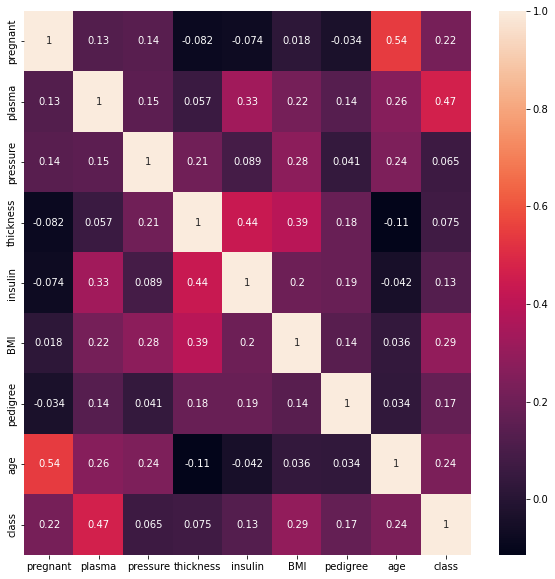

In [ ]:
# 상관관계 분석
import seaborn as sb

plt.figure(figsize=(10, 10))
sb.heatmap(pima.corr(), annot=True)

In [ ]:
# 특성 데이터와 라벨 데이터로 분리
X = pima.iloc[:, :-1]
y = pima.iloc[:, -1]

X.shape, y.shape

((768, 8), (768,))

In [ ]:
# 원핫 인코딩 (수치로 된 클래스만 원핫인코딩이 가능)
from tensorflow.keras.utils import to_categorical

y_en = to_categorical(y)

y_en.shape

(768, 2)

In [ ]:
# 훈련데이터와 테스트데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_en, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((576, 8), (192, 8), (576, 2), (192, 2))

In [ ]:
# 신경망 설계
model14 = Sequential()

model14.add(Dense(units=16, input_dim=8, activation="sigmoid"))

model14.add(Dense(units=32, activation="sigmoid"))
model14.add(Dense(units=16, activation="sigmoid"))

# 원핫인코딩한 이진분류
model14.add(Dense(units=2, activation="softmax"))

model14.compile(loss="binary_crossentropy", optimizer="adam",
                metrics=["accuracy"])

In [ ]:
# 훈련하기
h14 = model14.fit(X_train, y_train, epochs=100, batch_size=10,
                  validation_data=(X_test, y_test))

Epoch 1/100
58/58 [==============================] - 2s 12ms/step - loss: 0.6956 - accuracy: 0.6007 - val_loss: 0.6455 - val_accuracy: 0.6771
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.6424 - val_loss: 0.6312 - val_accuracy: 0.6771
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6424 - val_loss: 0.6283 - val_accuracy: 0.6771
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6424 - val_loss: 0.6272 - val_accuracy: 0.6771
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6424 - val_loss: 0.6277 - val_accuracy: 0.6771
Epoch 6/100
58/58 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6424 - val_loss: 0.6235 - val_accuracy: 0.6771
Epoch 7/100
58/58 [==============================] - 0s 5ms/step - loss: 0.6467 - accuracy: 0.6424 - val_loss: 0.6247 - val_accuracy: 0.6771
Epoch 8/100


In [ ]:
# 예측하기
y_pred = model14.predict(X_test)

for i in range(10, 20) :
  print(f"실제값 : {y_test[i]}, 예측값 : {y_pred[i]}")

실제값 : [0. 1.], 예측값 : [0.2923396  0.70766044]
실제값 : [0. 1.], 예측값 : [0.28112283 0.7188772 ]
실제값 : [1. 0.], 예측값 : [0.9839782  0.01602178]
실제값 : [1. 0.], 예측값 : [0.42379427 0.57620573]
실제값 : [1. 0.], 예측값 : [0.8127906  0.18720946]
실제값 : [1. 0.], 예측값 : [0.93955404 0.06044592]
실제값 : [0. 1.], 예측값 : [0.6760675  0.32393253]
실제값 : [1. 0.], 예측값 : [0.9725503  0.02744966]
실제값 : [1. 0.], 예측값 : [0.88752335 0.11247666]
실제값 : [1. 0.], 예측값 : [0.68439275 0.31560725]


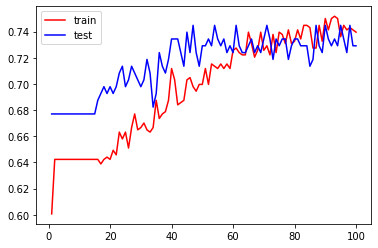

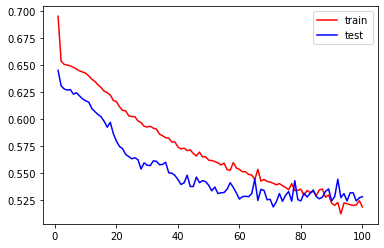

In [ ]:
# 시각화하기
acc = h14.history["accuracy"]
val_acc = h14.history["val_accuracy"]
loss = h14.history["loss"]
val_loss = h14.history["val_loss"]

e = range(1, len(acc) + 1)

plt.plot(e, acc, "r", label="train")
plt.plot(e, val_acc, "b", label="test")
plt.legend()
plt.show()

plt.plot(e, loss, "r", label="train")
plt.plot(e, val_loss, "b", label="test")
plt.legend()
plt.show()

# [실습]다진 분류

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 원핫 인코딩 (수치로 된 클래스만 원핫인코딩이 가능)
from tensorflow.keras.utils import to_categorical

y_en = to_categorical(iris.target)

y_en.shape

(150, 3)

In [ ]:
# 훈련데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, y_en,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((112, 4), (38, 4), (112, 3), (38, 3))

In [ ]:
# 훈련데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_en, random_state = 999)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model15 = Sequential()

#입력층
model15.add(Dense(units=16, input_dim=4, activation="sigmoid")) #처음에는 input_dim보다 크게 설정

#은닉층
model15.add(Dense(units=32, activation="sigmoid"))
model15.add(Dense(units=64, activation="sigmoid"))
model15.add(Dense(units=32, activation="sigmoid"))
model15.add(Dense(units=16, activation="sigmoid"))

#출력층
#라벨을 원핫인코딩 한 경우네는 units을 라벨의 클래스 수로 설정
# activation = softmax 출력층에만  은닉층와 출력층의 softmax의 역할이 다르다
#y = 출력층의 수
model15.add(Dense(units=3, activation="softmax"))

model15.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                80        
                                                                 
 dense_22 (Dense)            (None, 32)                544       
                                                                 
 dense_23 (Dense)            (None, 64)                2112      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 3)                 51        
                                                                 
Total params: 5,395
Trainable params: 5,395
Non-traina

In [ ]:
model15.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
h15 = model15.fit(X_train, y_train, batch_size=10, epochs=100,
                  validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.6964 - val_loss: 0.6294 - val_accuracy: 0.5789
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6010 - accuracy: 0.6964 - val_loss: 0.6021 - val_accuracy: 0.5789
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5722 - accuracy: 0.6964 - val_loss: 0.5655 - val_accuracy: 0.5789
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.6964 - val_loss: 0.5595 - val_accuracy: 0.5789
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5387 - accuracy: 0.6964 - val_loss: 0.5485 - val_accuracy: 0.5789
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5278 - accuracy: 0.6964 - val_loss: 0.5316 - val_accuracy: 0.5789
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5210 - accuracy: 0.7054 - val_loss: 0.5321 - val_accuracy: 0.5789
Epoch 8/100
1

In [ ]:
# 예측하기
y_pred = model15.predict(X_test)

for i in range(10, 20) :
  print(f"실제값 : {y_test[i]}, 예측값 : {y_pred[i]}")

실제값 : [0. 0. 1.], 예측값 : [0.00184645 0.02490392 0.9732496 ]
실제값 : [0. 1. 0.], 예측값 : [0.00630467 0.9750343  0.01866101]
실제값 : [0. 1. 0.], 예측값 : [0.00627003 0.9713532  0.02237682]
실제값 : [0. 1. 0.], 예측값 : [0.00637806 0.9688955  0.02472637]
실제값 : [0. 1. 0.], 예측값 : [0.00653513 0.9655966  0.02786824]
실제값 : [1. 0. 0.], 예측값 : [0.9928429  0.00601202 0.0011451 ]
실제값 : [0. 1. 0.], 예측값 : [0.00639437 0.96854824 0.02505736]
실제값 : [0. 1. 0.], 예측값 : [0.0063957 0.9685249 0.0250794]
실제값 : [1. 0. 0.], 예측값 : [0.99234396 0.00646149 0.00119459]
실제값 : [1. 0. 0.], 예측값 : [0.99290717 0.00595418 0.00113867]


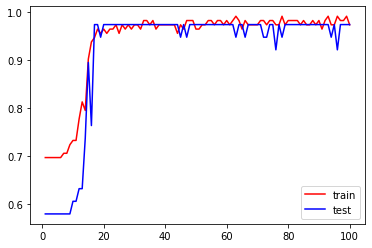

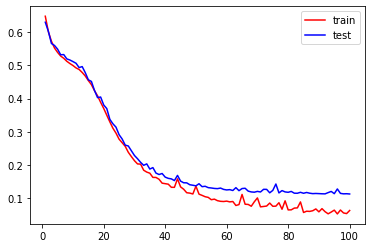

In [ ]:
# 시각화하기
acc = h15.history["accuracy"]
val_acc = h15.history["val_accuracy"]
loss = h15.history["loss"]
val_loss = h15.history["val_loss"]

e = range(1, len(acc) + 1)

plt.plot(e, acc, "r", label="train")
plt.plot(e, val_acc, "b", label="test")
plt.legend()
plt.show()

plt.plot(e, loss, "r", label="train")
plt.plot(e, val_loss, "b", label="test")
plt.legend()
plt.show()